In [6]:
using LinearAlgebra
include("hmat.jl")

check_err (generic function with 1 method)

In [2]:
function readfile(filename)
    S = read(filename, String)
    M = map(x->parse(Float64, x), split(S))
    n = Int(round(sqrt(length(M))))
    copy(reshape(M, n, n)')
end

readfile (generic function with 1 method)

In [3]:
M = readfile("flap/FSEMonesideN1023P3.txt")

3070×3070 Array{Float64,2}:
  3.93709      -8.90002       0.0          …   0.0        0.0       0.0    
  8.90002       4.14674       0.0              0.0        0.0       0.0    
 -1.31336      -0.748759      3.93709          0.0        0.0       0.0    
  0.748759      0.609229      8.90002          0.0        0.0       0.0    
 -0.171814     -0.033494     -1.31336          0.0        0.0       0.0    
  0.033494      0.00944697    0.748759     …   0.0        0.0       0.0    
 -0.0666564    -0.00836043   -0.171814         0.0        0.0       0.0    
  0.00836043    0.00152178    0.033494         0.0        0.0       0.0    
 -0.0347651    -0.00323271   -0.0666564        0.0        0.0       0.0    
  0.00323271    0.000436683   0.00836043       0.0        0.0       0.0    
 -0.0211055    -0.00156186   -0.0347651    …   0.0        0.0       0.0    
  0.00156186    0.000167982   0.00323271       0.0        0.0       0.0    
 -0.0140699    -0.000865243  -0.0211055        0.0        0.

In [4]:
size(M)

(3070, 3070)

In [26]:
include("hmat.jl")
cs = uniform_cluster(size(M,1),64)
c = cluster_from_list(cs)
print(c)

3070(1,3070)
2048(1,2048) 1022(2049,3070)
1024(1,1024) 1024(1025,2048) 512(2049,2560) 510(2561,3070)
512(1,512) 512(513,1024) 512(1025,1536) 512(1537,2048) 256(2049,2304) 256(2305,2560) 256(2561,2816) 254(2817,3070)
256(1,256) 256(257,512) 256(513,768) 256(769,1024) 256(1025,1280) 256(1281,1536) 256(1537,1792) 256(1793,2048) 128(2049,2176) 128(2177,2304) 128(2305,2432) 128(2433,2560) 128(2561,2688) 128(2689,2816) 128(2817,2944) 126(2945,3070)
128(1,128) 128(129,256) 128(257,384) 128(385,512) 128(513,640) 128(641,768) 128(769,896) 128(897,1024) 128(1025,1152) 128(1153,1280) 128(1281,1408) 128(1409,1536) 128(1537,1664) 128(1665,1792) 128(1793,1920) 128(1921,2048) 64(2049,2112) 64(2113,2176) 64(2177,2240) 64(2241,2304) 64(2305,2368) 64(2369,2432) 64(2433,2496) 64(2497,2560) 64(2561,2624) 64(2625,2688) 64(2689,2752) 64(2753,2816) 64(2817,2880) 64(2881,2944) 64(2945,3008) 62(3009,3070)
64(1,64) 64(65,128) 64(129,192) 64(193,256) 64(257,320) 64(321,384) 64(385,448) 64(449,512) 64(513,576) 64

In [41]:
MM = M + M'
H, P = construct_hmat(MM, c, 64, 5, 1e-6, -1) # modest error
H, P = construct_hmat(MM, c, 64, 5, 1e-8, -1) # very small error

* (512, 512), 512, 5
* (256, 256), 256, 5
* (128, 128), 128, 5
* (128, 128), 12, 5
* (128, 128), 12, 5
* (128, 128), 128, 5
* (256, 256), 13, 5
* (128, 128), 6, 5
* (128, 128), 5, 5
* (128, 128), 12, 5
* (128, 128), 6, 5
* (256, 256), 13, 5
* (128, 128), 6, 5
* (128, 128), 12, 5
* (128, 128), 5, 5
* (128, 128), 6, 5
* (256, 256), 256, 5
* (128, 128), 128, 5
* (128, 128), 12, 5
* (128, 128), 12, 5
* (128, 128), 128, 5
* (512, 512), 14, 5
* (256, 256), 6, 5
* (128, 128), 4, 5
* (128, 128), 4, 5
* (128, 128), 5, 5
* (128, 128), 4, 5
* (256, 256), 5, 5
* (256, 256), 13, 5
* (128, 128), 6, 5
* (128, 128), 5, 5
* (128, 128), 12, 5
* (128, 128), 6, 5
* (256, 256), 6, 5
* (128, 128), 4, 5
* (128, 128), 4, 5
* (128, 128), 5, 5
* (128, 128), 4, 5
* (512, 512), 14, 5
* (256, 256), 6, 5
* (128, 128), 4, 5
* (128, 128), 5, 5
* (128, 128), 4, 5
* (128, 128), 4, 5
* (256, 256), 13, 5
* (128, 128), 6, 5
* (128, 128), 12, 5
* (128, 128), 5, 5
* (128, 128), 6, 5
* (256, 256), 5, 5
* (256, 256), 6, 5
* (

* (254, 254), 254, 5
* (128, 128), 128, 5
* (128, 126), 12, 5
* (126, 128), 12, 5
* (126, 126), 126, 5


(Hmat
  A: Array{Float64}((0, 0)) Array{Float64}(0,0)
  B: Array{Float64}((0, 0)) Array{Float64}(0,0)
  C: Array{Float64}((0, 0)) Array{Float64}(0,0)
  P: Array{Int64}((0,)) Int64[]
  is_rkmatrix: Bool false
  is_fullmatrix: Bool false
  is_hmat: Bool true
  m: Int64 3070
  n: Int64 3070
  children: Array{Hmat}((2, 2))
  s: Cluster
  t: Cluster
, Int64[])

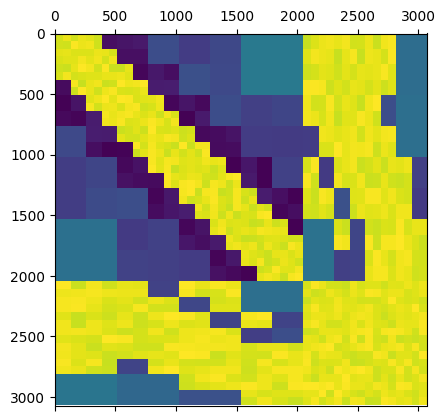

PyObject <matplotlib.image.AxesImage object at 0x12837d828>

In [42]:
matshow(H)

In [43]:
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
G = verify_lu_error(H);

Matvec Error = 3.2617258697776716e-13
Matrix Error = 1.2775937447995461e-12
Solve Error = 0.00018920124648473424
LU Matrix Error = 3.138176533609583e-6


In [213]:
include("tools.jl")
include("hconstruct.jl")
M = readfile("FSEMonesideN1023P3.txt")
MM = (M + M');
MM = MM[end-2047:end,end-2047:end]
H = construct_hmat(MM, 64, 1e-3, 5, -1)
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
G = verify_lu_error(H);
lu!(H);
op = x->H\x
g0 = rand(2048)
g = MM*g0
y1,err1 = pygmres_with_call_back(MM, g)
y2,err2 = pygmres_with_call_back(MM, g, op)
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
xlabel("iteration")
ylabel("$||r_k||_2$")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), norm(y2-g0)/norm(g0))

Matvec Error = 5.801456738562236e-5


Matrix Error = 1.1727139072325594e-5
Solve Error = 1.2038606121963917e-5
LU Matrix Error = 4.1749371590444144e-7
Iteration 0, Error = 0.2168310484763355
Iteration 1, Error = 0.06631196306598665
Iteration 2, Error = 0.035627272627921654
Iteration 3, Error = 0.01939197413897872
Iteration 4, Error = 0.010210446510860671
Iteration 5, Error = 0.0067165061496952914
Iteration 6, Error = 0.004507531121394461
Iteration 7, Error = 0.0035575402325005415
Iteration 8, Error = 0.002555259154736239
Iteration 9, Error = 0.002084587178073406
Iteration 10, Error = 0.0015617845435761247
Iteration 11, Error = 0.001285863610441447
Iteration 12, Error = 0.0011186460639137673
Iteration 13, Error = 0.0009386381650667176
Iteration 14, Error = 0.0008321488948871215
Iteration 15, Error = 0.0007357387598019626
Iteration 16, Error = 0.0006773668542234207
Iteration 17, Error = 0.0006268567687657573
Iteration 18, Error = 0.0005879613263340244
Iteration 19, Error = 0.0005522365662780865
Iteration 20, Error = 0.000535

Iteration 195, Error = 2.9672203839977514e-5
Iteration 196, Error = 2.939914947713508e-5
Iteration 197, Error = 2.9109218936326735e-5
Iteration 198, Error = 2.875911022091832e-5
Iteration 199, Error = 2.8419427145448196e-5
Iteration 200, Error = 2.8097368599557712e-5
Iteration 201, Error = 2.7769428236795466e-5
Iteration 202, Error = 2.7500610000719937e-5
Iteration 203, Error = 2.7252239178357186e-5
Iteration 204, Error = 2.6990113148874382e-5
Iteration 205, Error = 2.670755174319773e-5
Iteration 206, Error = 2.6398831366271924e-5
Iteration 207, Error = 2.606631986935073e-5
Iteration 208, Error = 2.572404257723211e-5
Iteration 209, Error = 2.5397178317398574e-5
Iteration 210, Error = 2.4936715825100187e-5
Iteration 211, Error = 2.4506440660602384e-5
Iteration 212, Error = 2.402185085097267e-5
Iteration 213, Error = 2.3546449399946104e-5
Iteration 214, Error = 2.3070784664755762e-5
Iteration 215, Error = 2.2509145300608697e-5
Iteration 216, Error = 2.209102948923902e-5
Iteration 217, Er

LoadError: syntax: invalid interpolation syntax: "$\"

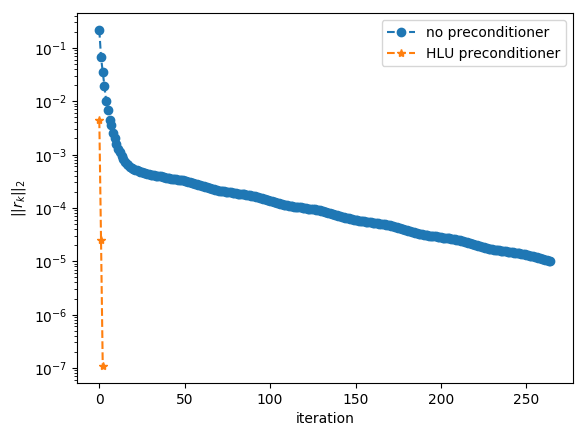

Error(No Preconditioner) = 0.012917, Error(Preconditioner) = 0.000001

In [215]:
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
xlabel("iteration")
ylabel(L"||r_k||_2")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), 
                                                                    norm(y2-g0)/norm(g0))

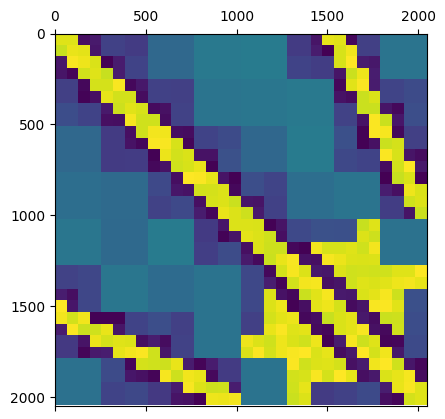

PyObject <matplotlib.image.AxesImage object at 0x1ceb42860>

In [209]:
H = construct_hmat(MM, 64, 1e-6, 5, -1);
matshow(H)

Matvec Error = 1.1351563811217072e-6


Matrix Error = 5.765703870012027e-7
Matvec Error = 6.267868905650451e-11
Matrix Error = 1.0152333768802187e-10
Solve Error = 0.25970542122480794
LU Matrix Error = 0.368869983352388
Iteration 0, Error = 0.20669927455489412
Iteration 1, Error = 0.05529789896481026
Iteration 2, Error = 0.02849043376516559
Iteration 3, Error = 0.017243327936205182
Iteration 4, Error = 0.0072110235751855455
Iteration 5, Error = 0.0051445731724846745
Iteration 6, Error = 0.0032996777769179865
Iteration 7, Error = 0.002391852229216289
Iteration 8, Error = 0.001936097127957906
Iteration 9, Error = 0.0014533598620142941
Iteration 10, Error = 0.0011352633846944437
Iteration 11, Error = 0.000932415389174231
Iteration 12, Error = 0.0007982608484817033
Iteration 13, Error = 0.0006260620636050343
Iteration 14, Error = 0.0005505707131535875
Iteration 15, Error = 0.00048432755682410874
Iteration 16, Error = 0.0004285354954597575
Iteration 17, Error = 0.00040621846700706813
Iteration 18, Error = 0.0003733614122684839
I

Iteration 188, Error = 1.9983280861940206e-5
Iteration 189, Error = 1.9632909192710117e-5
Iteration 190, Error = 1.9170321564273396e-5
Iteration 191, Error = 1.894703084614808e-5
Iteration 192, Error = 1.855995927338831e-5
Iteration 193, Error = 1.832252840387881e-5
Iteration 194, Error = 1.815155202625034e-5
Iteration 195, Error = 1.785882497524021e-5
Iteration 196, Error = 1.7702754721995994e-5
Iteration 197, Error = 1.754966978933158e-5
Iteration 198, Error = 1.7358532693256824e-5
Iteration 199, Error = 1.7143389391657063e-5
Iteration 200, Error = 1.6954789680055966e-5
Iteration 201, Error = 1.6768553463716117e-5
Iteration 202, Error = 1.66207365390071e-5
Iteration 203, Error = 1.649009224285821e-5
Iteration 204, Error = 1.622622280186313e-5
Iteration 205, Error = 1.607685894884153e-5
Iteration 206, Error = 1.5886699362608708e-5
Iteration 207, Error = 1.5571754919886444e-5
Iteration 208, Error = 1.5388894384024916e-5
Iteration 209, Error = 1.5062381475105977e-5
Iteration 210, Error 

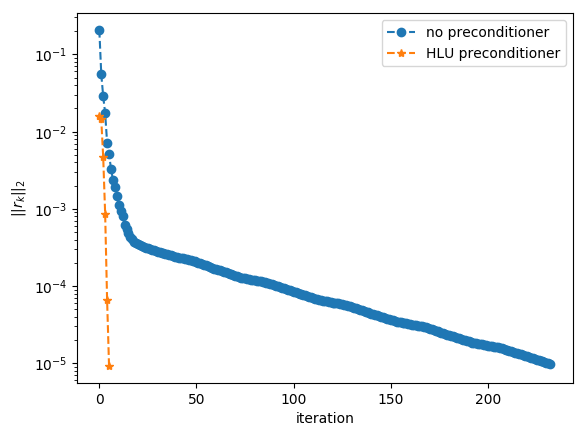

Error(No Preconditioner) = 0.015668, Error(Preconditioner) = 0.000083

In [217]:
include("tools.jl")
include("hconstruct.jl")
MM = (M + M');
MM = MM[1:end,1:end]
H = construct_hmat(MM, 64, 1e-3, 5, -1)
H2 = construct_hmat(MM, 64, 1e-6, 5, -1)
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
verify_matvec_error(H2, MM)
verify_matrix_error(H2, MM)
G = verify_lu_error(H);
lu!(H);
op = x->H\x
g0 = rand(size(MM,1))
g = MM*g0
y1,err1 = pygmres_with_call_back(H2, g)
y2,err2 = pygmres_with_call_back(H2, g, op)
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
xlabel("iteration")
ylabel(L"||r_k||_2")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), 
                                                                    norm(y2-g0)/norm(g0))